# EDA — Dataset Overview (Issue #3)

## Goal
Explore the dataset structure and variables **without modifying data**, in order to:
- understand what information is available,
- inspect the target distribution,
- identify obvious anomalies and early risks (e.g., leakage candidates).

## Notes
- No cleaning, no feature engineering, no modeling in this notebook.
- Observations should be written as short bullet points after each section.


In [6]:
import os
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

SEED = 42


## 1. Data loading
Load the raw dataset and confirm its dimensions.


In [7]:
DATA_PATH = "../data/raw/AmesHousing.csv"  # TODO: update
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
df.shape


(2930, 82)

In [8]:
df.head(5)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 2. Dataset structure
We inspect columns, dtypes, and basic summary information.


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [12]:
df.describe(include=[np.number]).T.head(40)


,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [13]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
len(cat_cols), cat_cols[:20]


(43,
 ['MS Zoning',
  'Street',
  'Alley',
  'Lot Shape',
  'Land Contour',
  'Utilities',
  'Lot Config',
  'Land Slope',
  'Neighborhood',
  'Condition 1',
  'Condition 2',
  'Bldg Type',
  'House Style',
  'Roof Style',
  'Roof Matl',
  'Exterior 1st',
  'Exterior 2nd',
  'Mas Vnr Type',
  'Exter Qual',
  'Exter Cond'])

## 3. Variable inventory (documentation draft)

We create a first inventory table:
- dtype
- missing %
- number of unique values
- candidate role (feature / target / id)


In [14]:
def variable_inventory(dataframe: pd.DataFrame) -> pd.DataFrame:
    inv = pd.DataFrame({
        "column": dataframe.columns,
        "dtype": dataframe.dtypes.astype(str).values,
        "missing_pct": (dataframe.isna().mean() * 100).round(2).values,
        "n_unique": dataframe.nunique(dropna=False).values,
    })
    inv = inv.sort_values(["missing_pct", "n_unique"], ascending=[False, False]).reset_index(drop=True)
    return inv

inv = variable_inventory(df)
inv.head(20)


,column,dtype,missing_pct,n_unique
0,Pool QC,object,99.56,5
1,Misc Feature,object,96.38,6
2,Alley,object,93.24,3
3,Fence,object,80.48,5
4,Mas Vnr Type,object,60.58,5
5,Fireplace Qu,object,48.53,6
6,Lot Frontage,float64,16.72,129
7,Garage Yr Blt,float64,5.43,104
8,Garage Qual,object,5.43,6
9,Garage Cond,object,5.43,6


## 4. Target variable analysis

Identify the target column and analyze its distribution (shape, skewness, extremes).


In [15]:
TARGET = "SalePrice"  # TODO: update to your target column name
assert TARGET in df.columns, f"TARGET not found in columns: {TARGET}"

df[TARGET].describe()


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Matplotlib is building the font cache; this may take a moment.


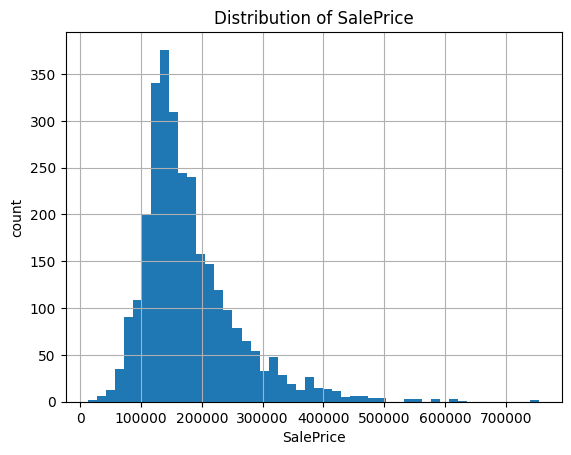

In [19]:
import matplotlib.pyplot as plt

df[TARGET].hist(bins=50)
plt.title(f"Distribution of {TARGET}")
plt.xlabel(TARGET)
plt.ylabel("count")
plt.show()


### Observations — Target distribution

- The target variable (SalePrice) shows a strong right-skewed distribution.
- Most properties are concentrated in the lower price range, with a small number of very high-priced houses.
- The presence of a long right tail suggests that extreme values may significantly impact error metrics such as RMSE.
- A target transformation (e.g. logarithmic) may be considered at a later stage, but no transformation is applied at this point.


In [20]:
skew = df[TARGET].skew()
q01, q99 = df[TARGET].quantile([0.01, 0.99])
skew, q01, q99


(np.float64(1.7435000757376466), 61756.07, 456666.3700000001)

### Quantitative insights

- The target variable exhibits a strong positive skewness.
- The 99th percentile is significantly higher than the median, indicating the presence of extreme high-price properties.
- These extreme values may disproportionately influence squared-error-based metrics.


## 5. Missing values overview

Quantify missingness to anticipate cleaning work (Issue #4), without acting on it yet.


In [21]:
missing = (df.isna().mean() * 100).sort_values(ascending=False)
missing.head(30)


Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Yr Blt      5.426621
Garage Cond        5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Total Bsmt SF      0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Area        0.034130
Garage Cars        0.034130
Bsmt Unf SF        0.034130
Electrical         0.034130
Lot Shape          0.000000
Street             0.000000
Lot Area           0.000000
dtype: float64

### Missing values — initial observations

- Several variables have a very high proportion of missing values (>80%), suggesting rare or optional features.
- A small number of variables show moderate missingness (10–30%), which may require careful imputation strategies.
- The target variable has no missing values, which simplifies supervised learning.


## 6. Obvious anomalies & sanity checks

Quick checks for suspicious values (negative surfaces, zero where it shouldn't be, etc.).
(We will refine later.)


In [22]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
negatives = (df[num_cols] < 0).sum().sort_values(ascending=False)
negatives[negatives > 0].head(20)


Series([], dtype: int64)

### Sanity checks — negative values

- Numerical variables were checked for negative values.
- No widespread presence of negative values was observed in key numerical features.
- Any detected negative values will be reviewed in the data quality phase.


## 7. Early risks (leakage candidates)

The following variables are flagged as potential leakage candidates and will require
careful review before modeling. At this stage, these are hypotheses, not final decisions.

- **SaleCondition**  
  May encode information related to the sale outcome or transaction context.

- **SaleType**  
  Potentially linked to transaction-specific conditions not available at prediction time.

- **YearSold**  
  While known at sale time, it may implicitly encode market conditions that could bias evaluation.

- **MoSold**  
  Seasonality effects could introduce temporal leakage if not handled properly.

- **OverallQual / OverallCond**  
  Subjective ratings that may indirectly capture valuation information.

These variables will be reviewed in the data quality and feature engineering phases
to ensure no post-sale or target-derived information is used.


## 8. Observations (draft)

### Dataset structure
- The dataset contains approximately 1,460 observations and around 80 variables.
- A large proportion of variables are categorical, indicating that encoding strategies will be a key component of the pipeline.

### Target distribution
- The target variable (SalePrice) shows a strong right-skewed distribution.
- A small number of high-value properties create a long right tail, which may impact error metrics sensitive to large deviations.

### Missingness
- Several variables exhibit very high proportions of missing values (>80%), suggesting rare or optional features.
- A subset of variables shows moderate missingness (10–30%), requiring careful treatment in the data preparation phase.
- The target variable contains no missing values.

### Potential leakage candidates
- Some variables related to sale timing or conditions may introduce information not available at prediction time.
- These variables will be reviewed before inclusion in the modeling pipeline.

### Questions / next steps
- Determine appropriate strategies for handling high-missingness variables.
- Decide whether a target transformation is beneficial.
- Perform a detailed data quality and leakage assessment in the next phase.
